# Face Detection 

## Based on Haar Cascade Classifier

related paper ( Rapid Object Detection using a Boosted Cascade of Simple Features ) is available, Written by Paul Viola

Linke of this paper:
https://ieeexplore.ieee.org/abstract/document/990517/

### The algorithm appears in four stage:

1 - Calculating Haar Features <br>
2 - Creating Integral Images <br> 
3 - Using Adaboost <br> 
4 - Implementing Cascading Classifiers <br> 
<br>
This algorithm requires a lot of positive and negative image of faces and non-faces.<br>
(where positive images are those where the object to be detected is present, negative are those where it is not)

### Bad Features
using different of intensities and look at edges on image. <br>
It is costly operation, for example for an 24*24 image we have 160,000. <br>
In this paper, the author use an efficient alternative.

### Calculating Haar Features

The first step is to collect Haar features. <br> 

calculation involves summing the pixel intensities in each region and <br>
and calculating the differences between the sums. 

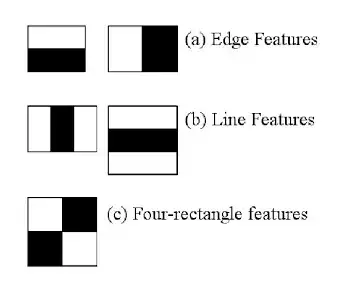

These features can be difficult to determine for a large image. So using integral images is essential. 

### Creating Integral Images

integral images essentially speed up the calculation of these Haar Features. ( details on paper ) <br> 
Instead of computing at every pixel, it instead creates sub-rectangles and creates array refrences for each of those sub-rectangles. <br> 

### Using AdaBoost to Speed Up

In the paper with Haar Features we can use just 200 feature and <br>
and get the accuracy of 95% for the mentioned classifier. <br>
By combining number of lazy classifiers, we can get a strong classifier.<br>
For example in an 24*24 image, with different of intensities we have <br>
we have 160,000 features, but in the paper by using integral images and <br>
and AdaBoost, we can get a strong classifier with 95% accuracy.

### Code

OpenCV offers pre-trained Haar cascade algorithms, organized into categories (faces, eyes and so forth), depending on the images they have been trained on.



In [ ]:
# import requirements
import cv2
import numpy as np

In [ ]:
# Load xml files and video capture
cap = cv2.VideoCapture(0)
# Need to load cascade xm5 detection
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
cv2.namedWindow("Frame")

In [ ]:
def nothing(x):
    pass

while True: 

    flag, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)


    # gray image, 1 size original size, 5 
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for rect in faces:
        (x, y, w, h) = rect
        frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    print(faces)

    cv2.imshow("Frame", frame) 

    key = cv2.waitKey(1)
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()

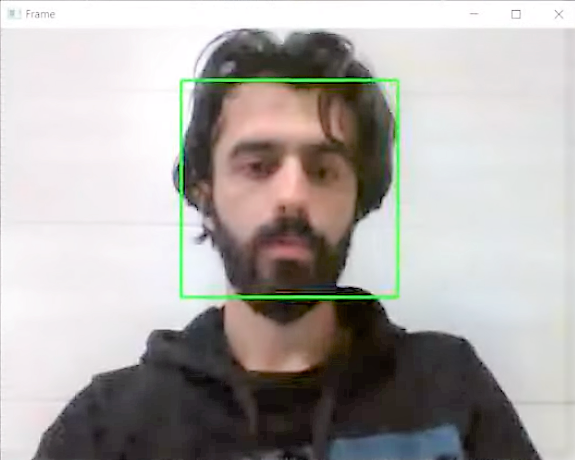